# 실기시험2 (60)
---
* 과목: Python+빅데이터
* 이름:
* 날짜:

시작하기전 학습자료에서 데이터를 다운받으세요. 아래 주소에서 직접 다운받으셔도 괜찮습니다. 모델링 목적은 자전거의 수요를 예측하는 것입니다.

> 데이터 출처: [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

plt.rcParams["font.size"] = 13
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
from google.colab import files
files.upload()

Saving bike_sharing_train.csv to bike_sharing_train.csv


{'bike_sharing_train.csv': b'datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count\n2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16\n2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40\n2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32\n2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13\n2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1\n2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.0032,0,1,1\n2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0,2,0,2\n2011-01-01 07:00:00,1,0,0,1,8.2,12.88,86,0,1,2,3\n2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0,1,7,8\n2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0,8,6,14\n2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36\n2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56\n2011-01-01 12:00:00,1,0,0,1,17.22,21.21,77,19.0012,29,55,84\n2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94\n2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106\n2011-01-01 15:00:00,1,0,0,2,18.

---
##**문제1** EDA
---



---
### **데이터 확인**
---

In [ ]:
df = pd.read_csv("bike_sharing_train.csv")
df.head(50)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB





* **INSIGHT**
  * .전체 데이터 개수가 10886개이고 속성은 12개이다.
  * .속성 중 예측값인 count 와 11개의 독립변수(Features)가 있다.
  * .windspeed에 0으로 입력된 것을 결측값으로 보고 처리 예정
  * .datetime은 날짜 제거후 시간대 별로 이산화 예정

---
### **모든 속성의 분포 확인**
---

['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


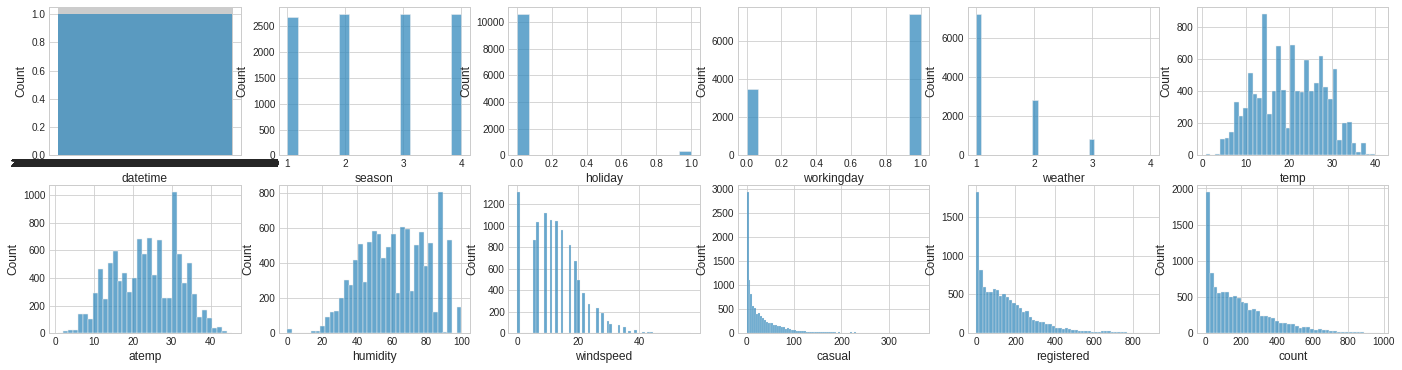

In [ ]:
f, ax = plt.subplots(2,6, figsize=(24,6))
ax = ax.flatten()
col_list = list(df.columns)
print(col_list)
for i in range(len(col_list)):
  sns.histplot(data=df, x= col_list[i],ax=ax[i])
plt.show()

* **INSIGHT**

  * 필요없는 값
    * datetime - 시간별 날짜 + 타임스탬프 (문자열)(시간대 별로 처리후 판단)
    * casual - 등록되지 않은 사용자 대여 수 (int)
    * registered - 등록된 사용자 대여 수 (int)
  * 범주형 값
    * season - (int)
          1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 
    * holiday - 그 날이 휴일로 간주되는지 여부 1/0 (int)
    * workingday - 그 날이 주말도 휴일도 아닌 여부  1/0(int)
    * weather - (int)
          1: 맑음, 약간 흐림, 약간 흐림
          2: 안개 + 흐림, 안개 + 부서진 구름, 안개 + 약간의 구름, 안개
          3: 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름
          4: 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개
    
  * 수치형 값
    * temp - 섭씨 온도 (float)
    * atemp - (체감)섭씨 온도 (float)
    * humidity - 상대 습도 (int)
    * windspeed - 풍속 (float)
    * casual - 등록되지 않은 사용자 대여 수 (int)
    * registered - 등록된 사용자 대여 수 (int)
    * count - 총 대여 횟수.      (int)**예측값**

---
### **범주형 자료 시각화**
---

In [ ]:
f, ax = plt.subplots(1,4, figsize=(24,4))
ax = ax.flatten()
col_list = ["season","holiday","workingday","weather"]
print(col_list)
for i in range(len(col_list)):
  sns.histplot(data=df, x= col_list[i],ax=ax[i])
plt.show()

* **INSIGHT**

  * .계절은 고르게 분포하여 있다
  * .휴일이 아닌날이 압도적으로 많다 (데이터 불균형)
  * .평일은 평일이 아닌날이 두배로 많다
  * .날씨는 맑음이 나머지 날씨(안개,가벼운눈)의 합보다 두배 많다

In [ ]:
f, ax = plt.subplots(1,4, figsize=(24,4))
ax = ax.flatten()
col_list = ['temp','atemp','humidity','windspeed']
print(col_list)
for i in range(len(col_list)):
  sns.histplot(data=df, x= col_list[i],ax=ax[i], kde=True)
plt.show()
f, ax = plt.subplots(1,3, figsize=(24,4))
ax = ax.flatten()
col_list = ['casual','registered','count']
print(col_list)
for i in range(len(col_list)):
  sns.histplot(data=df, x= col_list[i],ax=ax[i], kde=True)
plt.show()

* **INSIGHT**

  * .온도와 체감온도,습도는 고르게 분포 되어있다
  * .풍속은 결측값인 0이 아주많이 count되어있다
  * .등록/비등록의 대여수가 0인날이 아주 많고, 대여수가 많은날이 count가 적어지는 구조 

---
### **예측(count)값과의 관계 시각화 - 범주형 자료**
---

In [ ]:
f, ax = plt.subplots(1,4, figsize=(24,4))
ax = ax.flatten()
col_list = ["season","holiday","workingday","weather"]
print(col_list)
for i in range(len(col_list)):
  sns.boxplot(data=df,x=col_list[i],y="count",ax=ax[i])
plt.show()

* **INSIGHT**

  * .계절에 따라 대여수의 차이가 많이 없다(가을/여름/겨울/봄 순)
  * .휴일이 아닌날에 대여가 많다 
  * .평일인 날에 대여가 많다    
  * .holiday와 working이 같은 결과가 나오므로 같은의미인 holiday와 workingday를 묶어서 한 feature로 만들 예정
  * .날씨는 따뜻한 날일수록 대여가 많고 날씨가 좋지않을수록 대여가 적어진다

---
### **예측(count)값과의 관계 시각화 - 수치형 자료**
---

In [ ]:
col_list = ['temp','atemp','humidity','windspeed']
print(col_list)
for i in range(len(col_list)):
  sns.jointplot(data=df,x=col_list[i],y="count")
plt.show()

* **INSIGHT**

  * .온도 체감온도 극히 춥거나 덥거나 하면 대여수가 낮아진다 습도도 극히 높거나 낮거나하면 대여수가 낮아지며 온도 등에 비해 영향을 적게 받는다
  * .풍속은 낮을수록 대여수가 높아지며 풍속 0에 대해서는 제거를 할 예정
  * .전처리 시 이산형으로 (온도/체감온도)분류해도 적절해 보인다

In [ ]:
col_list =['casual','registered']
print(col_list)
for i in range(len(col_list)):
  sns.jointplot(data=df,x=col_list[i],y="count")
plt.show()

* **INSIGHT**

  * .등록된 사용자와 미등록 사용자의 대여수 이므로 합하면 대여수와 같은 의미의 데이터이므로 의미가 없는 데이터이다

#### **전체 페어플롯**

In [ ]:
sns.pairplot(df, hue="count")
plt.show()

#### **상관관계**

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

---
### **Summary**
---

* **INSIGHT**

  * .count와 연관성이 많은 속성은 다음과 같다
  * .casual
  * .registered
  * .위 둘은 연관성은 높지만 합하면 count와 같은 의미이므로 count를 목적으로 두기 위해서는 삭제해야 한다
  * .연관성은 높지 않게 나왔지만 예측에 도움 될수 있는 속성은 다음고 같다
  * ."season"
  * ."holiday"
  * ."workingday"
  * ."weather"
  * ."datetime"
  * .이 중에서 결측값이 있는 속성은 weather이다
  * .weather은 0값 중앙값으로 처리
  * .datetime은 년월일 시간의 object형태이므로 시간만 따로 추출하여 시간대별로 만들예정
  * .그 외 속성은 사용하지 않는다

---
##**문제2** 데이터 전처리
---



####**데이터 분할**

In [ ]:
drop_list = ['casual','registered']
train = df.drop(drop_list,axis=1)

In [ ]:
train.head()

---
###**결측값 처리**
---

wind speed 의 결측치를 평균으로 처리

In [ ]:
mask_wind =  train['windspeed'] = 0.0
train.loc[mask_wind,'windspeed'] = train['windspeed'].median()

---
###**이산화**
---

In [ ]:
#날짜를 제거하고 시간만 남기는 처리
for i in range(len(train['datetime'])):
  if len(train['datetime'][i])> 4:
    (train['datetime'][i])=int(train['datetime'][i][-8:-6])
#시간별로 구간을 만드는 처리(0-4시:0 / 4-8시:1 / 8-12시:2 / 12-16시:3 /16-20시:4 /20-24:5)
bin = [-1,4,8,12,16,20,25]
group_name = [0,1,2,3,4,5]
train['datetime']=pd.cut(train['datetime'], bins=bin, labels=group_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


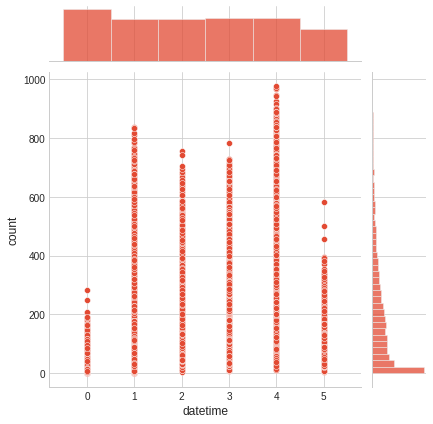

In [ ]:
sns.jointplot(data= train, x="datetime",y="count")
plt.show()

* **INSIGHT**
  * . datetime이 년월일로 입력되어 있는 데이터를 시간만 남긴뒤 구간으로 묶어 
  처리함
  * .밤보다는 낮에 대여수가 높고 퇴근시간인 16에서 20시에 가장 많이 빌림


## **5. 결과**
---

---
###**테스트셋을 위한 전처리 과정 함수화**
---

In [1]:
def preproces_bike(df):
  #필요없는 속성제거
  drop_list = ['casual','registered']
  df_pre = df.drop(drop_list,axis=1)

  #결측값 중앙값으로 처리
  mask_wind =  df_pre['windspeed'] == 0.0
  df_pre.loc[mask_wind,'windspeed'] = df_pre['windspeed'].median()

  #날짜를 제거하고 시간만 남기는 처리
  for i in range(len(df_pre['datetime'])):
    if len(df_pre['datetime'][i])> 4:
      (df_pre['datetime'][i])=int(df_pre['datetime'][i][-8:-6])

  #이산화 -시간별로 구간을 만드는 처리(0-4시:0 / 4-8시:1 / 8-12시:2 / 12-16시:3 /16-20시:4 /20-24:5)
  bin = [-1,4,8,12,16,20,25]
  group_name = [0,1,2,3,4,5]
  df_pre['datetime']=pd.cut(df_pre['datetime'], bins=bin, labels=group_name)
  #정규화-
  for col in ['temp',	'atemp',	'humidity',	'windspeed']:
    df_pre[col] = (df_pre[col]-df_pre[col].min())/(df_pre[col].max()-df_pre[col].min())

  return df_pre

#### **train 데이터셋**

In [ ]:
df_train =pd.read_csv("bike_sharing_train.csv")
train=preproces_bike(df_train)
train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,0,1,0,0,1,9.84,14.395,81,0.0,16
1,0,1,0,0,1,9.02,13.635,80,0.0,40
2,0,1,0,0,1,9.02,13.635,80,0.0,32
3,0,1,0,0,1,9.84,14.395,75,0.0,13
4,0,1,0,0,1,9.84,14.395,75,0.0,1


---
###**전처리 결과 확인**
---

#### **train 데이터셋**

['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count']


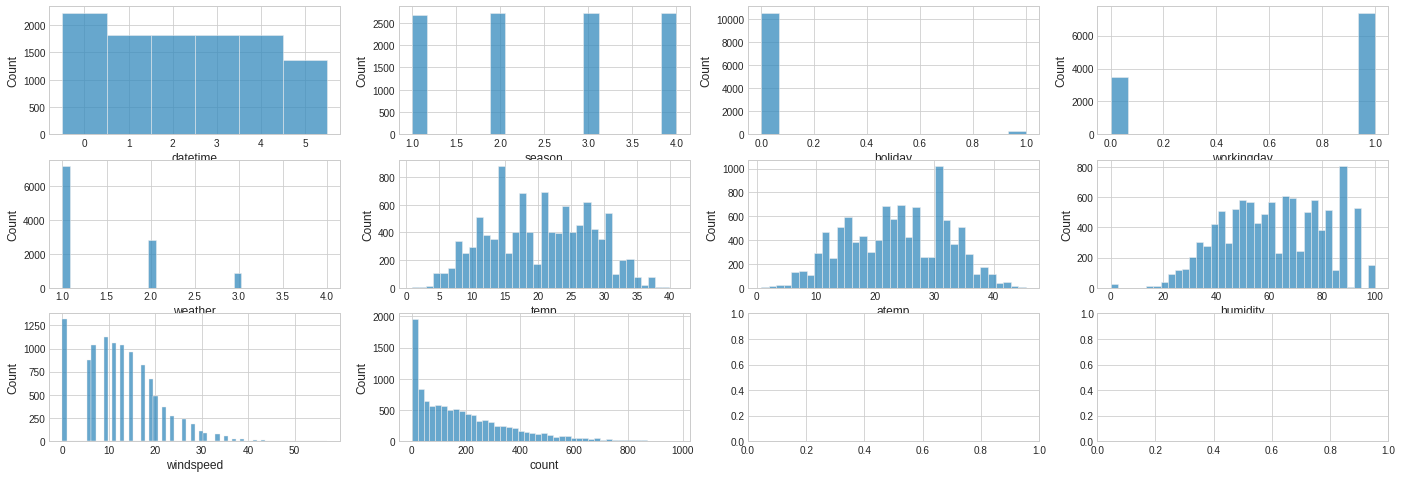

In [ ]:
f, ax = plt.subplots(3,4, figsize=(24,8))
ax = ax.flatten()
col_list = list(train.columns)
print(col_list)
for i in range(len(col_list)):
  sns.histplot(data=train, x= col_list[i],ax=ax[i])
plt.show()

In [ ]:
train.to_csv("train_pre_bike.csv")